# Data Analysis

## Import Libraries

In [1]:
import pandas as pd

# Primary Data

In [2]:
casualty5years_df = pd.read_csv('dft-road-casualty-statistics-casualty-last-5-years.csv',low_memory=False)
collision5years_df = pd.read_csv('dft-road-casualty-statistics-collision-last-5-years.csv',low_memory=False)

In [3]:
casualty2023_df = pd.read_csv('dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2023.csv',low_memory=False)
collision2023_df = pd.read_csv('dft-road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023.csv',low_memory=False)

In [4]:
casualty5years_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2018010080971,2018,010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8,E01011051
1,2018010080971,2018,010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1,E01002066
2,2018010080973,2018,010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3,E01003531
3,2018010080974,2018,010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3,E01000185
4,2018010080981,2018,010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7,E01003643


### Rename columns

In [5]:
cols = {'accident_index':'collision_index','accident_year':'collision_year','accident_reference':'collision_reference',
        'accident_severity':'legacy_collision_severity','did_police_officer_attend_scene_of_accident':'did_police_officer_attend_scene_of_collision',
        'lsoa_of_accident_location':'lsoa_of_collision_location'}
casualty5years_df.rename(columns=cols,inplace=True)
collision5years_df.rename(columns=cols,inplace=True)

In [6]:
print(casualty5years_df.shape)
print(collision5years_df.shape)

(693028, 19)
(538461, 36)


In [7]:
print(casualty2023_df.shape)
print(collision2023_df.shape)

(62674, 19)
(49316, 36)


In [8]:
casualty5years_df.columns == casualty2023_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [9]:
collision5years_df.columns == collision2023_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

### Combining data

In [10]:
casualty_df = pd.concat([casualty5years_df,casualty2023_df],axis=0)
collision_df = pd.concat([collision5years_df,collision2023_df],axis=0)

In [11]:
print(casualty_df.shape)
print(collision_df.shape)
print(casualty2023_df.shape[0]+casualty5years_df.shape[0],casualty2023_df.shape[1])
print(collision2023_df.shape[0]+collision5years_df.shape[0],collision5years_df.shape[1])

(755702, 19)
(587777, 36)
755702 19
587777 36


## Check for missing values

In [13]:
# Check for missing values in casualty df
missing_data = casualty_df.isnull().sum()
print("Missing values in each column:\n", missing_data)

# Check for columns with missing data as a percentage of the total
missing_percentage = (casualty_df.isnull().sum() / len(casualty_df)) * 100
print("Percentage of missing data in each column:\n", missing_percentage)


Missing values in each column:
 collision_index                       0
collision_year                        0
collision_reference                   0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64
Percentage of missing data in each column:
 collision_index                       0.0
collision_year                        0.0
collision_reference                   0.0
vehicle_reference        

In [14]:
# Check for missing values in coliision df
missing_data = collision_df.isnull().sum()
print("Missing values in each column:\n", missing_data)

# Check for columns with missing data as a percentage of the total
missing_percentage = (collision_df.isnull().sum() / len(collision_df)) * 100
print("Percentage of missing data in each column:\n", missing_percentage)


Missing values in each column:
 collision_index                                   0
collision_year                                    0
collision_reference                               0
location_easting_osgr                           220
location_northing_osgr                          220
longitude                                       220
latitude                                        220
police_force                                      0
legacy_collision_severity                         0
number_of_vehicles                                0
number_of_casualties                              0
date                                              0
day_of_week                                       0
time                                              0
local_authority_district                          0
local_authority_ons_district                      0
local_authority_highway                           0
first_road_class                                  0
first_road_number               

## Check for data type

In [55]:
# Display data types of each column
print("Data types of each column:\n", casualty_df.dtypes)

Data types of each column:
 collision_index         object
casualty_reference       int64
age_band_of_casualty     int64
casualty_class           int64
sex_of_casualty          int64
age_of_casualty          int64
casualty_severity        int64
dtype: object


In [19]:
# Display data types of each column
print("Data types of each column:\n", collision_df.dtypes)

Data types of each column:
 collision_index                                  object
collision_year                                    int64
collision_reference                              object
location_easting_osgr                           float64
location_northing_osgr                          float64
longitude                                       float64
latitude                                        float64
police_force                                      int64
legacy_collision_severity                         int64
number_of_vehicles                                int64
number_of_casualties                              int64
date                                             object
day_of_week                                       int64
time                                             object
local_authority_district                          int64
local_authority_ons_district                     object
local_authority_highway                          object
first_road_class    

## Distribution of the data

Summary statistics for numerical columns:
        collision_year  vehicle_reference  casualty_reference  casualty_class  \
count   755702.000000      755702.000000       755702.000000   755702.000000   
mean      2020.149317           1.464714            1.367044        1.475731   
std          1.632057           2.454423            2.719973        0.724610   
min       2018.000000           1.000000            1.000000        1.000000   
25%       2019.000000           1.000000            1.000000        1.000000   
50%       2020.000000           1.000000            1.000000        1.000000   
75%       2022.000000           2.000000            1.000000        2.000000   
max       2023.000000         999.000000          999.000000        3.000000   

       sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count    755702.000000    755702.000000         755702.000000   
mean          1.375774        36.810470              6.312983   
std           0.521532        19.517706  

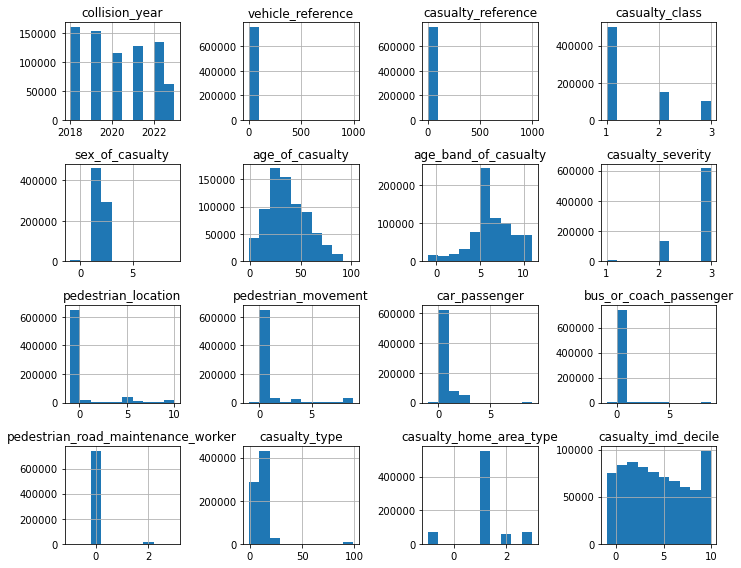

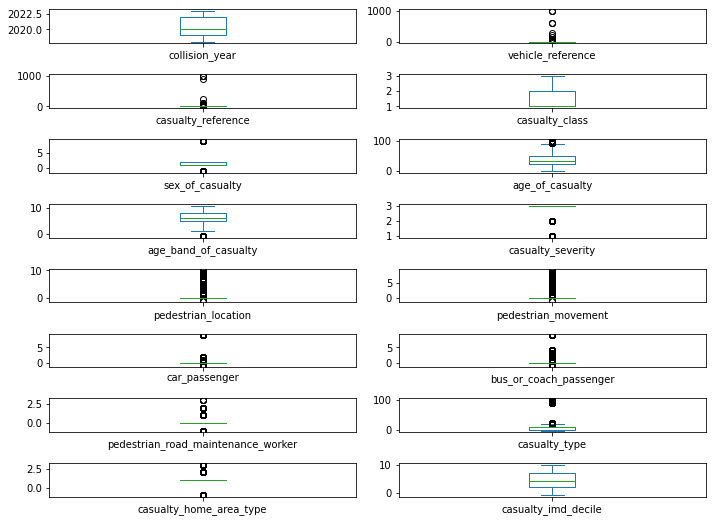

In [21]:
# Describe numerical features
numerical_summary = casualty_df.describe()
print("Summary statistics for numerical columns:\n", numerical_summary)

# For more detailed analysis, consider histograms or box plots
import matplotlib.pyplot as plt

# Histograms for all numerical data
casualty_df.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

# Boxplots for all numerical data to check for outliers
casualty_df.plot(kind='box', subplots=True, layout=(int(len(casualty_df.columns)/2), 2), figsize=(10, 8))
plt.tight_layout()
plt.show()


Summary statistics for numerical columns:
        collision_year  location_easting_osgr  location_northing_osgr  \
count   587777.000000          587557.000000            5.875570e+05   
mean      2020.167133          454447.332659            2.768507e+05   
std          1.629448           93806.867163            1.484053e+05   
min       2018.000000            1393.000000            1.023500e+04   
25%       2019.000000          391157.000000            1.752450e+05   
50%       2020.000000          461327.000000            2.153200e+05   
75%       2022.000000          529690.000000            3.843840e+05   
max       2023.000000          655345.000000            1.209512e+06   

           longitude       latitude   police_force  legacy_collision_severity  \
count  587557.000000  587557.000000  587777.000000              587777.000000   
mean       -1.219246      52.378960      27.711047                   2.767330   
std         1.373023       1.336998      24.502683               

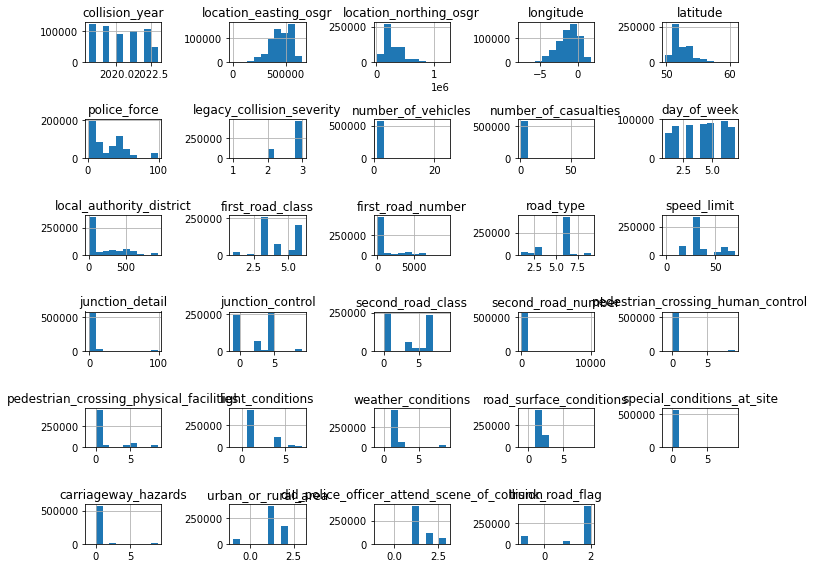

C:\Users\Acer\AppData\Local\Temp\ipykernel_11396\3261071211.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


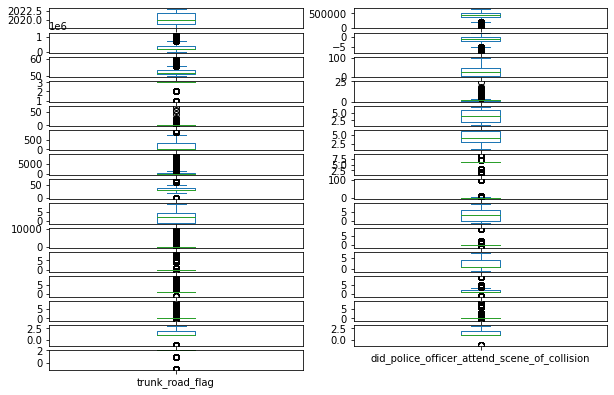

In [22]:
# Describe numerical features
numerical_summary = collision_df.describe()
print("Summary statistics for numerical columns:\n", numerical_summary)

# For more detailed analysis, consider histograms or box plots
import matplotlib.pyplot as plt

# Histograms for all numerical data
collision_df.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

# Boxplots for all numerical data to check for outliers
collision_df.plot(kind='box', subplots=True, layout=(int(len(collision_df.columns)/2), 2), figsize=(10, 8))
plt.tight_layout()
plt.show()


# Diving Deep into each part of data

## Data Quality Issues and correction on casualty data

In [25]:
casualty_df.columns

Index(['collision_index', 'collision_year', 'collision_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [26]:
casualty_df = casualty_df[['collision_index','casualty_reference','age_band_of_casualty','casualty_class',
                           'sex_of_casualty','age_of_casualty','casualty_severity']]

In [27]:
casualty_df.isna().sum()

collision_index         0
casualty_reference      0
age_band_of_casualty    0
casualty_class          0
sex_of_casualty         0
age_of_casualty         0
casualty_severity       0
dtype: int64

In [28]:
casualty_df.sex_of_casualty.value_counts()

 1    459162
 2    292201
-1      4294
 9        45
Name: sex_of_casualty, dtype: int64

In [29]:
casualty_df.loc[:,'sex_of_casualty'] = casualty_df['sex_of_casualty'].replace(-1,3).replace(9,3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11396\3240644977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casualty_df.loc[:,'sex_of_casualty'] = casualty_df['sex_of_casualty'].replace(-1,3).replace(9,3)


In [30]:
casualty_df.casualty_class.value_counts()

1    500345
2    151203
3    104154
Name: casualty_class, dtype: int64

In [31]:
casualty_df.casualty_severity.value_counts()

3    614763
2    131944
1      8995
Name: casualty_severity, dtype: int64

In [32]:
casualty_df.age_band_of_casualty.value_counts()

 6     159572
 7     115006
 8     101265
 5      85169
 4      76281
 9      68936
 10     37636
 3      33338
 11     30448
 2      19244
-1      15925
 1      12882
Name: age_band_of_casualty, dtype: int64

In [33]:
casualty_df.loc[:,'age_band_of_casualty'] = casualty_df['age_band_of_casualty'].replace(-1,12)

"""
0-5 -> 1
5-10->2
11-15->3
16-20->4
21-25->5
26-35->6
36-45->7
46-55->8
56-65->9
66-75->10
76+->11
unknown->12
"""

C:\Users\Acer\AppData\Local\Temp\ipykernel_11396\2146621630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casualty_df.loc[:,'age_band_of_casualty'] = casualty_df['age_band_of_casualty'].replace(-1,12)


'\n0-5 -> 1\n5-10->2\n11-15->3\n16-20->4\n21-25->5\n26-35->6\n36-45->7\n46-55->8\n56-65->9\n66-75->10\n76+->11\nunknown->12\n'

In [34]:
casualty_df.head()

,collision_index,casualty_reference,age_band_of_casualty,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
0,2018010080971,1,8,2,2,50,3
1,2018010080971,2,8,1,1,48,3
2,2018010080973,1,6,3,1,29,3
3,2018010080974,1,7,1,1,40,3
4,2018010080981,1,6,1,1,27,2


In [35]:
casualty_df.to_csv('casualty_18-23.csv',index=False)

## Data Quality Issues and correction on collision data

In [36]:
collision_df.columns

Index(['collision_index', 'collision_year', 'collision_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'legacy_collision_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_collision',
       'trunk_road_flag', 'lsoa_of_collision_location'],
      dtype='object')

In [37]:
collision_df = collision_df[['collision_index','collision_year','legacy_collision_severity','number_of_casualties',
                             'number_of_vehicles','road_surface_conditions','date','time','day_of_week','light_conditions',
                             'weather_conditions','local_authority_ons_district']]

In [38]:
collision_df.isna().sum()

collision_index                 0
collision_year                  0
legacy_collision_severity       0
number_of_casualties            0
number_of_vehicles              0
road_surface_conditions         0
date                            0
time                            0
day_of_week                     0
light_conditions                0
weather_conditions              0
local_authority_ons_district    0
dtype: int64

In [39]:
collision_df.light_conditions.value_counts()

 1    422328
 4    119695
 6     29849
 7     11662
 5      4228
-1        15
Name: light_conditions, dtype: int64

In [40]:
collision_df.loc[:,'light_conditions'] = collision_df['light_conditions'].replace(-1,8)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11396\173792883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_df.loc[:,'light_conditions'] = collision_df['light_conditions'].replace(-1,8)


In [41]:
collision_df.legacy_collision_severity.value_counts()

3    459495
2    119806
1      8476
Name: legacy_collision_severity, dtype: int64

In [42]:
collision_df.road_surface_conditions.value_counts()

 1    426131
 2    143044
 4      7216
 9      5708
-1      2485
 3      2384
 5       809
Name: road_surface_conditions, dtype: int64

In [43]:
collision_df.loc[:,'road_surface_conditions'] = collision_df['road_surface_conditions'].replace(-1,9)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11396\2190122231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_df.loc[:,'road_surface_conditions'] = collision_df['road_surface_conditions'].replace(-1,9)


In [44]:
collision_df.weather_conditions.value_counts()

 1    471178
 2     64808
 9     16727
 8     16271
 5      6756
 4      6002
 3      2822
 7      2479
 6       701
-1        33
Name: weather_conditions, dtype: int64

In [45]:
collision_df.loc[:,'weather_conditions'] = collision_df['weather_conditions'].replace(-1,9)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11396\1517603379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collision_df.loc[:,'weather_conditions'] = collision_df['weather_conditions'].replace(-1,9)


In [46]:
collision_df.day_of_week.value_counts()

6    96945
5    89709
4    87858
3    85936
2    82003
7    79356
1    65970
Name: day_of_week, dtype: int64

In [47]:
collision_df.local_authority_ons_district.value_counts()

E08000025    12571
E08000035     7710
E09000033     7076
E09000022     6419
E09000030     5810
             ...  
E07000053       87
E07000048       75
S12000023       73
S12000027       66
E06000053        7
Name: local_authority_ons_district, Length: 390, dtype: int64

In [48]:
collision_df.head()

,collision_index,collision_year,legacy_collision_severity,number_of_casualties,number_of_vehicles,road_surface_conditions,date,time,day_of_week,light_conditions,weather_conditions,local_authority_ons_district
0,2018010080971,2018,3,2,2,1,01/01/2018,01:30,2,4,1,E09000007
1,2018010080973,2018,3,1,1,1,01/01/2018,00:50,2,4,1,E09000025
2,2018010080974,2018,3,1,2,1,01/01/2018,00:45,2,4,1,E09000019
3,2018010080981,2018,2,1,2,2,01/01/2018,03:00,2,4,2,E09000025
4,2018010080982,2018,2,2,2,2,01/01/2018,02:20,2,4,1,E09000011


## Merging

In [49]:
df = pd.merge(collision_df,casualty_df,how='inner')

In [50]:
borough = ['E09000001','E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007', 'E09000008', 
           'E09000009', 'E09000010', 'E09000011', 'E09000012','E09000013', 'E09000014', 'E09000015', 'E09000016', 
           'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 
           'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031', 'E09000032', 'E09000033']
df = df[df['local_authority_ons_district'].isin(borough)]

In [51]:
df.replace(-1,pd.NA).isna().sum()

collision_index                    0
collision_year                     0
legacy_collision_severity          0
number_of_casualties               0
number_of_vehicles                 0
road_surface_conditions            0
date                               0
time                               0
day_of_week                        0
light_conditions                   0
weather_conditions                 0
local_authority_ons_district       0
casualty_reference                 0
age_band_of_casualty               0
casualty_class                     0
sex_of_casualty                    0
age_of_casualty                 6804
casualty_severity                  0
dtype: int64

In [52]:
# df.to_csv('2018-2023.csv',index=False)

In [53]:
df

,collision_index,collision_year,legacy_collision_severity,number_of_casualties,number_of_vehicles,road_surface_conditions,date,time,day_of_week,light_conditions,weather_conditions,local_authority_ons_district,casualty_reference,age_band_of_casualty,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
0,2018010080971,2018,3,2,2,1,01/01/2018,01:30,2,4,1,E09000007,1,8,2,2,50,3
1,2018010080971,2018,3,2,2,1,01/01/2018,01:30,2,4,1,E09000007,2,8,1,1,48,3
2,2018010080973,2018,3,1,1,1,01/01/2018,00:50,2,4,1,E09000025,1,6,3,1,29,3
3,2018010080974,2018,3,1,2,1,01/01/2018,00:45,2,4,1,E09000019,1,7,1,1,40,3
4,2018010080981,2018,2,1,2,2,01/01/2018,03:00,2,4,2,E09000025,1,6,1,1,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746240,2023481369636,2023,3,1,2,2,26/06/2023,12:56,2,1,2,E09000001,1,6,1,1,35,3
746241,2023481369643,2023,3,1,2,1,25/06/2023,18:50,1,1,1,E09000001,1,6,1,1,31,3
746242,2023481369648,2023,3,1,2,1,28/06/2023,07:10,4,1,1,E09000001,1,5,1,1,24,3
746243,2023481369657,2023,3,1,2,1,29/06/2023,08:50,5,1,1,E09000001,1,7,1,2,39,3


## Check for Duplicates


In [54]:
# Check for complete duplicates across all columns
duplicates = df[df.duplicated()]
print(f"Number of duplicate entries: {len(duplicates)}")

# Optionally, display the duplicates
if not duplicates.empty:
    print("Duplicate entries found:\n", duplicates)

# To check duplicates based on specific key columns (e.g., a unique ID or a combination of columns)
key_columns = ['collision_index']  # Adjust column names as necessary
duplicates_key = df[df.duplicated(subset=key_columns)]
print(f"Number of duplicates based on key columns {key_columns}: {len(duplicates_key)}")


Number of duplicate entries: 0
Number of duplicates based on key columns ['collision_index']: 21962
